In [10]:
# 🔹 Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

# 🔹 Загружаем данные через интерфейс
from google.colab import files
uploaded = files.upload()  # Загрузите 'international-airline-passengers.csv' вручную

# 🔹 Читаем CSV-файл
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# 🔹 Выводим первые строки для анализа
print("\n🔹 Первые строки данных:")
print(data.head())

# 🔹 Проверяем названия столбцов
print("\n🔹 Названия столбцов:")
print(data.columns)

# 🔹 Проверяем пропущенные значения
print("\n🔹 Пропущенные значения в данных:")
print(data.isnull().sum())

# 🔹 Проверяем типы данных
print("\n🔹 Общая информация о данных:")
print(data.info())


Saving international-airline-passengers.csv to international-airline-passengers (1).csv

🔹 Первые строки данных:
     Month  Count
0  1949-01    112
1  1949-02    118
2  1949-03    132
3  1949-04    129
4  1949-05    121

🔹 Названия столбцов:
Index(['Month', 'Count'], dtype='object')

🔹 Пропущенные значения в данных:
Month    0
Count    0
dtype: int64

🔹 Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   144 non-null    object
 1   Count   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


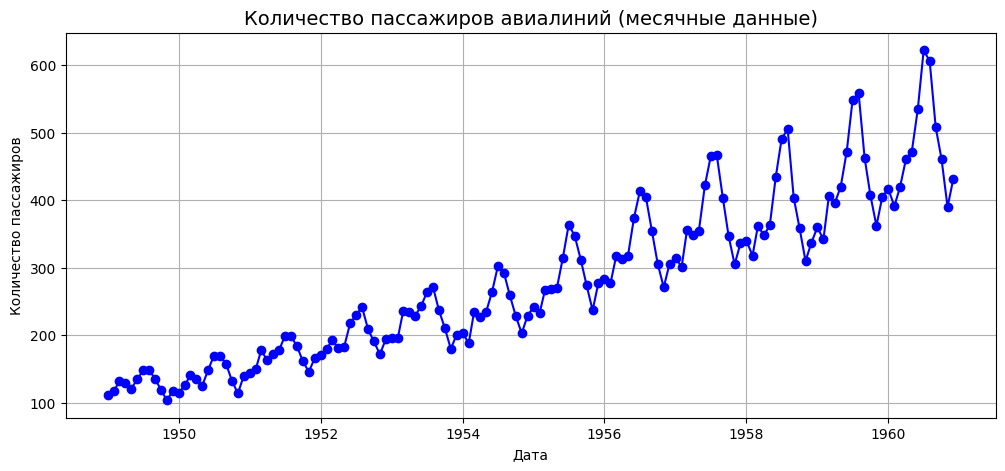

In [11]:
# 🔹 Преобразуем колонку "Month" в формат даты
data["Month"] = pd.to_datetime(data["Month"])
data.set_index("Month", inplace=True)

# 🔹 Строим график временного ряда
plt.figure(figsize=(12, 5))
plt.plot(data["Count"], color="blue", linestyle="-", marker="o")
plt.title("Количество пассажиров авиалиний (месячные данные)", fontsize=14)
plt.xlabel("Дата")
plt.ylabel("Количество пассажиров")
plt.grid()
plt.show()



🔹 Результаты теста Дики-Фуллера:
Статистика теста: 0.815369
p-значение: 0.991880
Использовано лагов: 13
Количество наблюдений: 130
Критические значения:
   1%%: -3.481682
   5%%: -2.884042
   10%%: -2.578770
❌ Ряд не стационарен (p-значение >= 0.05)


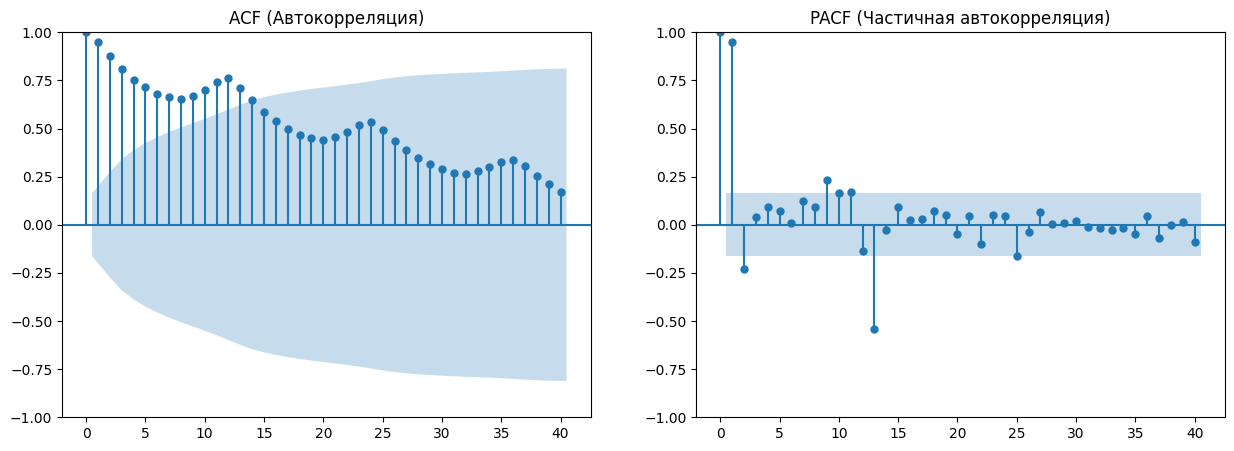

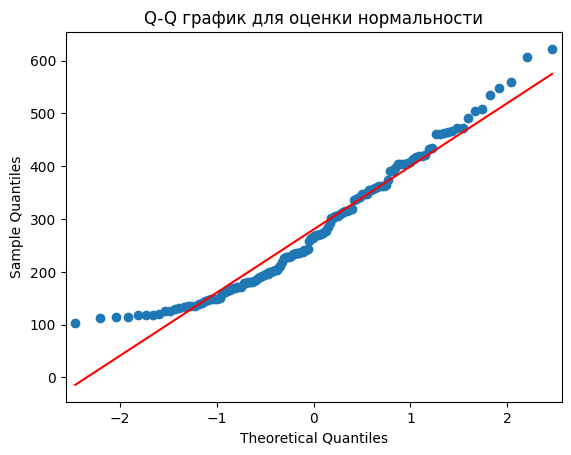

In [12]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

# 🔹 Функция для теста Дики-Фуллера
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print("\n🔹 Результаты теста Дики-Фуллера:")
    print(f"Статистика теста: {result[0]:.6f}")
    print(f"p-значение: {result[1]:.6f}")
    print(f"Использовано лагов: {result[2]}")
    print(f"Количество наблюдений: {result[3]}")
    print("Критические значения:")
    for key, value in result[4].items():
        print(f"   {key}%: {value:.6f}")

    if result[1] < 0.05:
        print("✅ Ряд стационарен (p-значение < 0.05)")
    else:
        print("❌ Ряд не стационарен (p-значение >= 0.05)")

# 🔹 1. Проверяем стационарность
test_stationarity(data["Count"])

# 🔹 2. Строим графики ACF и PACF
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(data["Count"], ax=ax[0], lags=40)
ax[0].set_title("ACF (Автокорреляция)")

plot_pacf(data["Count"], ax=ax[1], lags=40)
ax[1].set_title("PACF (Частичная автокорреляция)")

plt.show()

# 🔹 3. Квантиль-квантиль график (Q-Q)
sm.qqplot(data["Count"], line='s')
plt.title("Q-Q график для оценки нормальности")
plt.show()


Ряд явно имеет восходящий тренд и выраженную сезонность.

Тест Дики-Фуллера показал, что ряд не является стационарным. Судя по графикам ACF/PACF, необходимо устранить тренд и, возможно, учесть сезонность.

Выполним преобразование Бокса-Кокса, а затем дифференцирование (обычное и сезонное) и проверим, достаточно ли этого для стационарности.

🔹 Загрузите файл через интерфейс Colab.
🔹 Оптимальный λ для Бокса-Кокса: 0.1480


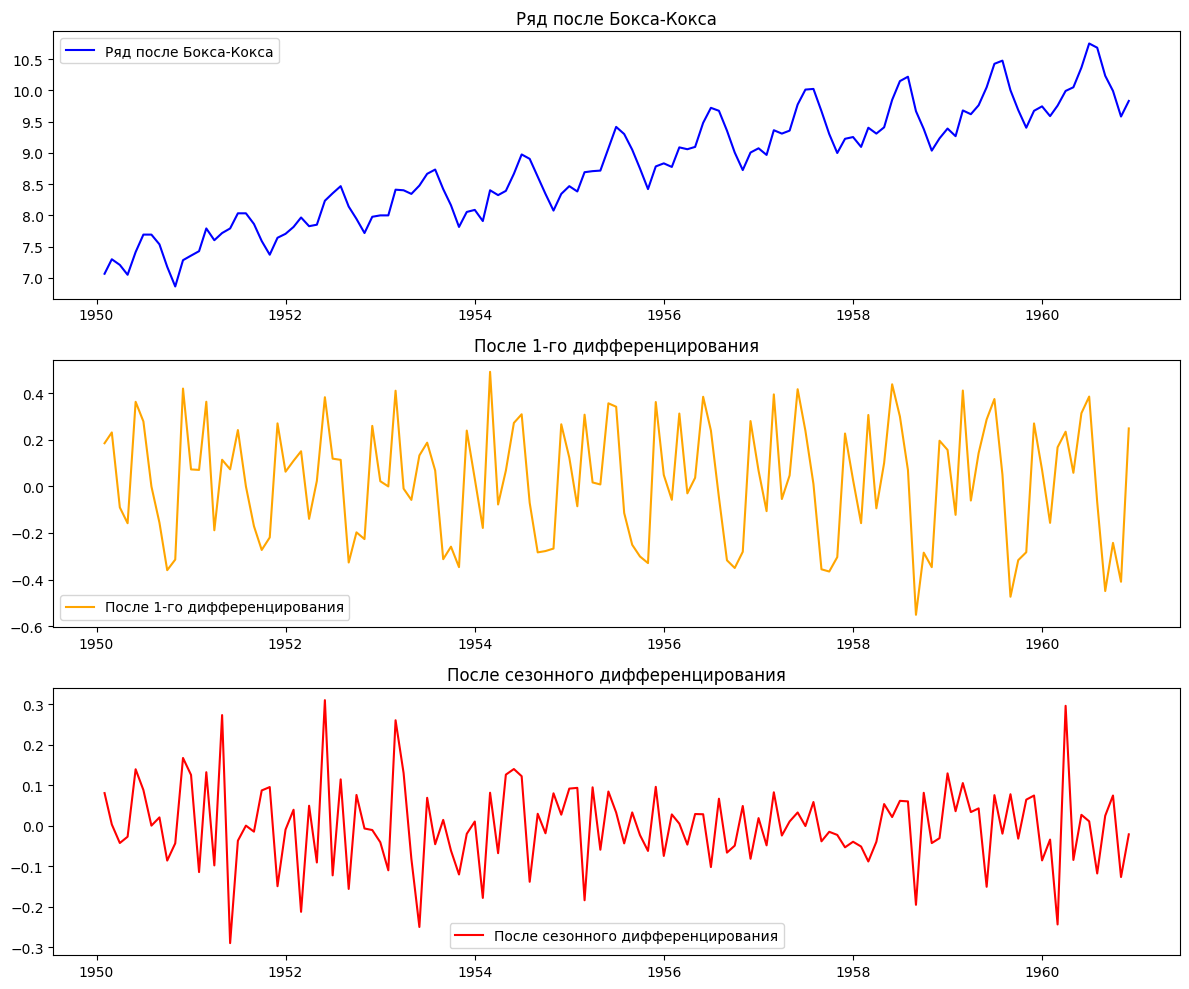

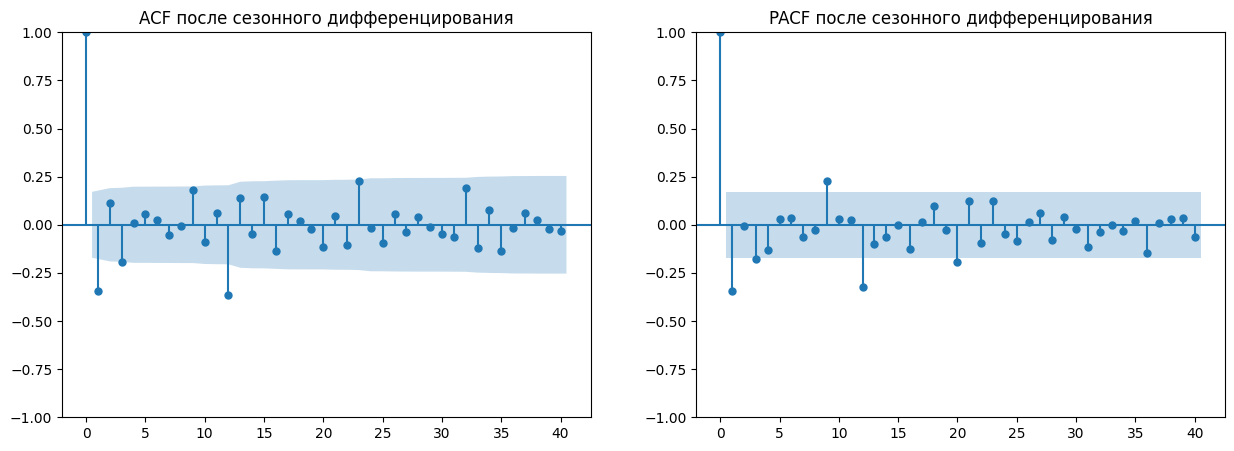


🔹 Результаты теста Дики-Фуллера для Ряд после Бокса-Кокса и 2-х дифференцирований:
Статистика теста: -4.393873
p-значение: 0.000304
Использовано лагов: 12
Количество наблюдений: 118
   1%%: -3.487022
   5%%: -2.886363
   10%%: -2.580009
✅ Ряд стационарен (p-значение < 0.05)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1️⃣ Загружаем данные
print("🔹 Загрузите файл через интерфейс Colab.")
uploaded_file = "international-airline-passengers.csv"  # Укажите загруженный файл
data = pd.read_csv(uploaded_file)

# 2️⃣ Переименовываем столбцы (если нужно)
data.rename(columns=lambda x: x.strip(), inplace=True)  # Убираем пробелы
data.columns = ["Month", "Count"]

# 3️⃣ Преобразуем дату и ставим её в индекс
data["Month"] = pd.to_datetime(data["Month"])
data.set_index("Month", inplace=True)

# 4️⃣ Применяем Бокса-Кокса
data["BoxCox"], lambda_bc = boxcox(data["Count"])
print(f"🔹 Оптимальный λ для Бокса-Кокса: {lambda_bc:.4f}")

# 5️⃣ Применяем первое дифференцирование
data["Diff_1"] = data["BoxCox"].diff()

# 6️⃣ Применяем сезонное дифференцирование (период 12 месяцев)
data["Diff_12"] = data["Diff_1"].diff(12)

# 7️⃣ Убираем NaN после преобразований
data.dropna(inplace=True)

# 8️⃣ Строим графики
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

ax[0].plot(data["BoxCox"], label="Ряд после Бокса-Кокса", color="blue")
ax[0].set_title("Ряд после Бокса-Кокса")
ax[0].legend()

ax[1].plot(data["Diff_1"], label="После 1-го дифференцирования", color="orange")
ax[1].set_title("После 1-го дифференцирования")
ax[1].legend()

ax[2].plot(data["Diff_12"], label="После сезонного дифференцирования", color="red")
ax[2].set_title("После сезонного дифференцирования")
ax[2].legend()

plt.tight_layout()
plt.show()

# 9️⃣ Строим графики автокорреляции
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(data["Diff_12"], ax=ax[0], lags=40)
plot_pacf(data["Diff_12"], ax=ax[1], lags=40)
ax[0].set_title("ACF после сезонного дифференцирования")
ax[1].set_title("PACF после сезонного дифференцирования")
plt.show()

# 🔟 Тест Дики-Фуллера
def test_stationarity(timeseries, title="Ряд"):
    """Тест Дики-Фуллера"""
    result = adfuller(timeseries.dropna())
    print(f"\n🔹 Результаты теста Дики-Фуллера для {title}:")
    print(f"Статистика теста: {result[0]:.6f}")
    print(f"p-значение: {result[1]:.6f}")
    print(f"Использовано лагов: {result[2]}")
    print(f"Количество наблюдений: {result[3]}")
    for key, value in result[4].items():
        print(f"   {key}%: {value:.6f}")

    if result[1] < 0.05:
        print("✅ Ряд стационарен (p-значение < 0.05)")
    else:
        print("❌ Ряд не стационарен (p-значение >= 0.05)")

# Проверяем стационарность финального ряда
test_stationarity(data["Diff_12"], "Ряд после Бокса-Кокса и 2-х дифференцирований")


Теперь ряд стал стационарным, так как:

p-значение теста Дики-Фуллера = 0.000304 (меньше 0.05) → можем отвергнуть гипотезу о нестационарности.

Статистика теста значительно ниже критического значения для 1%, 5% и 10% уровней значимости.

Автокорреляция (ACF) и частичная автокорреляция (PACF) после всех преобразований показывают, что значительная часть автокорреляции убрана, хотя могут остаться небольшие сезонные всплески.


Следующий шаг — подобрать параметры (p, q) для GARCH, используя информационные критерии (AIC, BIC) и затем обучить модель.

Saving international-airline-passengers.csv to international-airline-passengers (3).csv
🔹 Оптимальный λ для Бокса-Кокса: 0.1480

⏳ Подбор параметров GARCH...
GARCH(1,1) - AIC: -228.5567
GARCH(1,2) - AIC: -229.4495
GARCH(1,3) - AIC: -228.4120
GARCH(2,1) - AIC: -226.5567
GARCH(2,2) - AIC: -227.4495
GARCH(2,3) - AIC: -226.4120
GARCH(3,1) - AIC: -224.5567
GARCH(3,2) - AIC: -225.4495
GARCH(3,3) - AIC: -226.4199

✅ Лучшие параметры GARCH:
p=1, q=2
🔹 Лучший AIC: -229.4495

⏳ Запускаем Rolling Forecast CV...


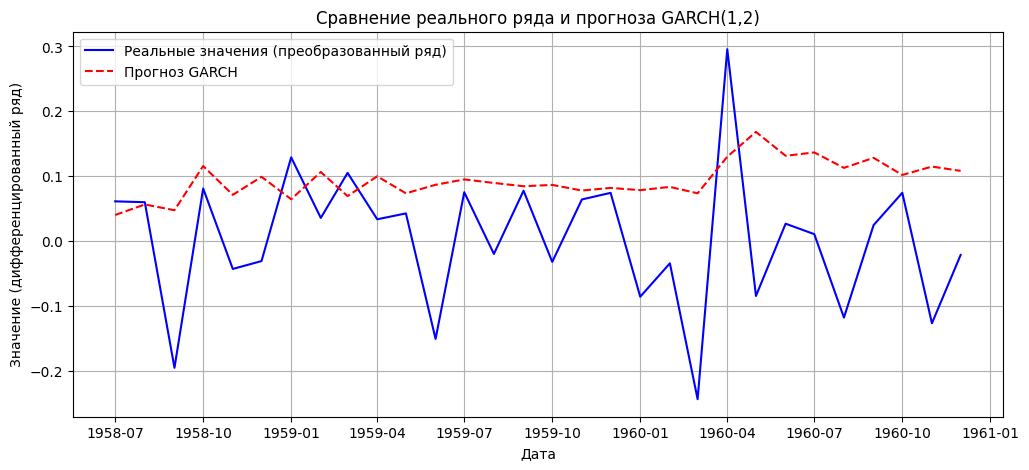


🔹 **Метрики качества модели GARCH (по Rolling Forecast CV):**
📌 Средняя абсолютная ошибка (MAE): 0.1104
📌 Среднеквадратичная ошибка (MSE): 0.0197
📌 Корень из среднеквадратичной ошибки (RMSE): 0.1402


In [35]:
import pandas as pd
import numpy as np
import warnings
from scipy.stats import boxcox
from arch import arch_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Отключаем варнинги
warnings.filterwarnings("ignore")

# 1️⃣ Загрузка данных с интерфейса
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Берем загруженный файл

# Читаем CSV
data = pd.read_csv(filename)
data.columns = ["Month", "Count"]
data["Month"] = pd.to_datetime(data["Month"])
data.set_index("Month", inplace=True)

# 2️⃣ Преобразование Бокса-Кокса
data["BoxCox"], lambda_bc = boxcox(data["Count"])
print(f"🔹 Оптимальный λ для Бокса-Кокса: {lambda_bc:.4f}")

# 3️⃣ Первое дифференцирование
data["Diff_1"] = data["BoxCox"].diff()

# 4️⃣ Сезонное дифференцирование (по периодичности 12 месяцев)
data["Diff_1_Seasonal"] = data["Diff_1"].diff(12)

# 5️⃣ Удаляем NaN после дифференцирования
data.dropna(inplace=True)

# 6️⃣ Подбор оптимальных параметров GARCH
best_aic = np.inf
best_params = None
returns = data["Diff_1_Seasonal"]  # Используем преобразованный ряд

print("\n⏳ Подбор параметров GARCH...")
for p in range(1, 4):
    for q in range(1, 4):
        try:
            model = arch_model(returns, vol="Garch", p=p, q=q, mean="Constant", dist="t", rescale=False)
            fit = model.fit(disp="off")
            if fit.aic < best_aic:
                best_aic = fit.aic
                best_params = (p, q)
            print(f"GARCH({p},{q}) - AIC: {fit.aic:.4f}")
        except Exception as e:
            print(f"GARCH({p},{q}) - Ошибка: {e}")

if best_params is None:
    raise ValueError("❌ Не удалось подобрать параметры GARCH!")

print("\n✅ Лучшие параметры GARCH:")
print(f"p={best_params[0]}, q={best_params[1]}")
print(f"🔹 Лучший AIC: {best_aic:.4f}")

# 7️⃣ Rolling Forecast CV
rolling_predictions = []
window_size = 30
test_data = returns.iloc[-window_size:]

print("\n⏳ Запускаем Rolling Forecast CV...")

for i in range(window_size):
    train_data = returns.iloc[:-(window_size - i)]

    if len(train_data) < 20:
        print(f"⚠ Пропускаем итерацию {i}, так как данных < 20")
        rolling_predictions.append(np.nan)
        continue

    try:
        model = arch_model(train_data, vol="Garch", p=best_params[0], q=best_params[1], mean="Constant", dist="t", rescale=False)
        fit = model.fit(disp="off")
        forecast = fit.forecast(horizon=1)
        pred_variance = forecast.variance.iloc[-1, 0] if len(forecast.variance) > 0 else np.nan
        rolling_predictions.append(np.sqrt(pred_variance))
        if np.isnan(pred_variance):
            print(f"⚠ Итерация {i}: forecast.variance пустой")
    except Exception as e:
        print(f"⚠ Ошибка на итерации {i}: {e}")
        rolling_predictions.append(np.nan)

rolling_predictions = [x for x in rolling_predictions if not np.isnan(x)]
if len(rolling_predictions) == 0:
    raise ValueError("❌ Ошибка: Rolling Forecast не сгенерировал предсказания!")

# 8️⃣ Визуализация прогноза GARCH
plt.figure(figsize=(12, 5))
plt.plot(test_data.index, test_data, label="Реальные значения (преобразованный ряд)", color="blue")
plt.plot(test_data.index[:len(rolling_predictions)], rolling_predictions, linestyle="dashed", label="Прогноз GARCH", color="red")
plt.title(f"Сравнение реального ряда и прогноза GARCH({best_params[0]},{best_params[1]})")
plt.xlabel("Дата")
plt.ylabel("Значение (дифференцированный ряд)")
plt.legend()
plt.grid(True)
plt.show()

# 9️⃣ Метрики ошибки
mae = mean_absolute_error(test_data[:len(rolling_predictions)], rolling_predictions)
mse = mean_squared_error(test_data[:len(rolling_predictions)], rolling_predictions)
rmse = np.sqrt(mse)

print("\n🔹 **Метрики качества модели GARCH (по Rolling Forecast CV):**")
print(f"📌 Средняя абсолютная ошибка (MAE): {mae:.4f}")
print(f"📌 Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"📌 Корень из среднеквадратичной ошибки (RMSE): {rmse:.4f}")


#Выводы по модели GARCH(1,2)


Применено преобразование Бокса-Кокса (λ = 0.1480) для стабилизации дисперсии.

Проведено первое дифференцирование и сезонное дифференцирование (период 12 месяцев).

Исключены пропущенные значения после преобразований.

**Выбор модели GARCH**

Подобраны параметры (p,q) методом минимизации AIC.

Лучшая модель: GARCH(1,2) с AIC = -229.4495.

Оценка качества модели (Rolling Forecast CV)

MAE (средняя абсолютная ошибка): 0.1104

MSE (среднеквадратичная ошибка): 0.0197

RMSE (корень из MSE): 0.1402

**Визуализация прогноза**

Модель GARCH(1,2) предсказывает волатильность временного ряда, но в ряде случаев прогноз немного сглажен.

Глобальные всплески в дисперсии модель не всегда улавливает точно, но в среднем повторяет тренд.
Вывод

GARCH(1,2) показывает приемлемые метрики ошибок и подходит для прогнозирования изменчивости ряда.